<a href="https://colab.research.google.com/github/ShafinMz08/Exploring-film-Industry-Trends/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploring Film Industry Trends**

## **Introduction**

The film industry is a dynamic and ever-evolving domain, where understanding audience preferences, predicting box office success, and identifying factors that influence movie ratings are crucial for informed decision-making. This project aims to analyze a comprehensive movie dataset from Kaggle to uncover trends and patterns in the industry.

Using machine learning models, we forecast key performance metrics like box office success and IMDb ratings based on variables such as budget, genre, and director. Additionally, interactive Tableau dashboards are developed to provide actionable insights, allowing users to explore the data by filtering parameters like genre, actor, and budget.

This project not only enhances our understanding of industry dynamics but also serves as a valuable tool for producers and directors to make data-driven decisions in filmmaking.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

##Loading Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
df = pd.read_csv('drive/MyDrive/tmdb_5000_movies.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
df.shape

(4803, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
df_credits = pd.read_csv('drive/MyDrive/tmdb_5000_credits.csv')
df_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
df_credits.shape

(4803, 4)

In [ ]:
df = df.merge(df_credits,on='title')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [ ]:
print(df.columns)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')


##Data Cleansing

In [ ]:
# Removing unnecessary columns from the dataset
rem_columns = ['id', 'keywords', 'homepage', 'original_title', 'production_countries', 'status', 'tagline', 'overview', 'spoken_languages', 'movie_id', 'cast', 'production_companies']
df.drop(columns=rem_columns, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             4809 non-null   int64  
 1   genres             4809 non-null   object 
 2   original_language  4809 non-null   object 
 3   popularity         4809 non-null   float64
 4   release_date       4808 non-null   object 
 5   revenue            4809 non-null   int64  
 6   runtime            4807 non-null   float64
 7   title              4809 non-null   object 
 8   vote_average       4809 non-null   float64
 9   vote_count         4809 non-null   int64  
 10  crew               4809 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 413.4+ KB


In [ ]:
#search for any duplicated rows in the dataset
df.duplicated().sum()

0

In [ ]:
#search for any missing values in the data set
df.isnull().sum()

,0
budget,0
genres,0
original_language,0
popularity,0
release_date,1
revenue,0
runtime,2
title,0
vote_average,0
vote_count,0


In [ ]:
#display rows with missing runtime values
df[df['runtime'].isnull()]

,budget,genres,original_language,popularity,release_date,revenue,runtime,title,vote_average,vote_count,crew
2658,15000000,"[{""id"": 18, ""name"": ""Drama""}]",it,0.738646,2015-12-03,0,NaN,Chiamatemi Francesco - Il Papa della gente,7.3,12,"[{""credit_id"": ""5660019ac3a36875f100252b"", ""de..."
4145,2,"[{""id"": 99, ""name"": ""Documentary""}]",en,0.050625,2015-12-12,0,NaN,"To Be Frank, Sinatra at 100",0.0,0,"[{""credit_id"": ""592b25e4c3a368783e065a2f"", ""de..."


In [ ]:
# release_date and runtime have null value
# fill null values of release_date and fill null runtime with median values
df['release_date'].fillna('', inplace=True)
df['runtime'].fillna(df['runtime'].median(), inplace=True)

<ipython-input-16-804d0646b1a1>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['release_date'].fillna('', inplace=True)
<ipython-input-16-804d0646b1a1>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [ ]:
df.isnull().sum().sum()

0

The dataset is clean. Lets take a step further and correct the datatypes of the values in some of the values to ensure no errors occur in the future

In [ ]:
#Ensure release_data is a datetime object and no null errors occur
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

In [ ]:

df.isna().sum()

,0
budget,0
genres,0
original_language,0
popularity,0
release_date,1
revenue,0
runtime,0
title,0
vote_average,0
vote_count,0


In [ ]:
print(df.columns)

Index(['budget', 'genres', 'original_language', 'popularity', 'release_date',
       'revenue', 'runtime', 'title', 'vote_average', 'vote_count', 'crew'],
      dtype='object')


In [ ]:
import ast

In [ ]:
# begin by writing a function to extract the director's name from the crew
import ast
def extract_dir(text):
    Literal = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
          Literal.append(i['name'])
    return Literal


# Apply the function to the crew column
df['crew'] = df['crew'].apply(extract_dir)
# Change the column name to Director
df.rename(columns={'crew': 'director'}, inplace=True)
df['director'].sample(5)

,director
899,"[Andrew Adamson, Vicky Jenson]"
3924,[Christopher Leitch]
1788,[Joel Schumacher]
2584,[Derek Cianfrance]
612,[David Slade]


In [ ]:
def convert(obj):
    Literal = []  # empty list
    for i in ast.literal_eval(obj): # convert string to list
        i['name']   # i is a dictionary
        Literal.append(i['name']) # append the name of the genre
    return Literal

df['genres']=df['genres'].apply(convert)
df.head(5)

,budget,genres,original_language,popularity,release_date,revenue,runtime,title,vote_average,vote_count,director
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",en,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,[James Cameron]
1,300000000,"[Adventure, Fantasy, Action]",en,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,[Gore Verbinski]
2,245000000,"[Action, Adventure, Crime]",en,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,[Sam Mendes]
3,250000000,"[Action, Crime, Drama, Thriller]",en,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,[Christopher Nolan]
4,260000000,"[Action, Adventure, Science Fiction]",en,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,[Andrew Stanton]


In [ ]:
df.describe()

,budget,popularity,release_date,revenue,runtime,vote_average,vote_count
count,4.809000e+03,4809.000000,4808,4.809000e+03,4809.000000,4809.000000,4809.000000
mean,2.902780e+07,21.491664,2002-12-23 19:30:44.925124608,8.227511e+07,106.880640,6.092514,690.331670
min,0.000000e+00,0.000000,1916-09-04 00:00:00,0.000000e+00,0.000000,0.000000,0.000000
25%,7.800000e+05,4.667230,1999-07-07 06:00:00,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,12.921594,2005-10-03 00:00:00,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,28.350529,2011-02-16 00:00:00,9.291317e+07,118.000000,6.800000,737.000000
max,3.800000e+08,875.581305,2017-02-03 00:00:00,2.787965e+09,338.000000,10.000000,13752.000000
std,4.070473e+07,31.803366,NaN,1.628379e+08,22.597973,1.193989,1234.187111


In [ ]:
#saving the cleaned dataset
df.to_csv('tmdb_movies_cleaned.csv', index=False)

#Data Exploration

In [ ]:
df['budget'] = df['budget'] / 1000000
df['budget'] = df['budget'].astype(int)

df['revenue'] = df['revenue'] / 1000000
df['revenue'] = df['revenue'].astype(int)

##Data Visualization

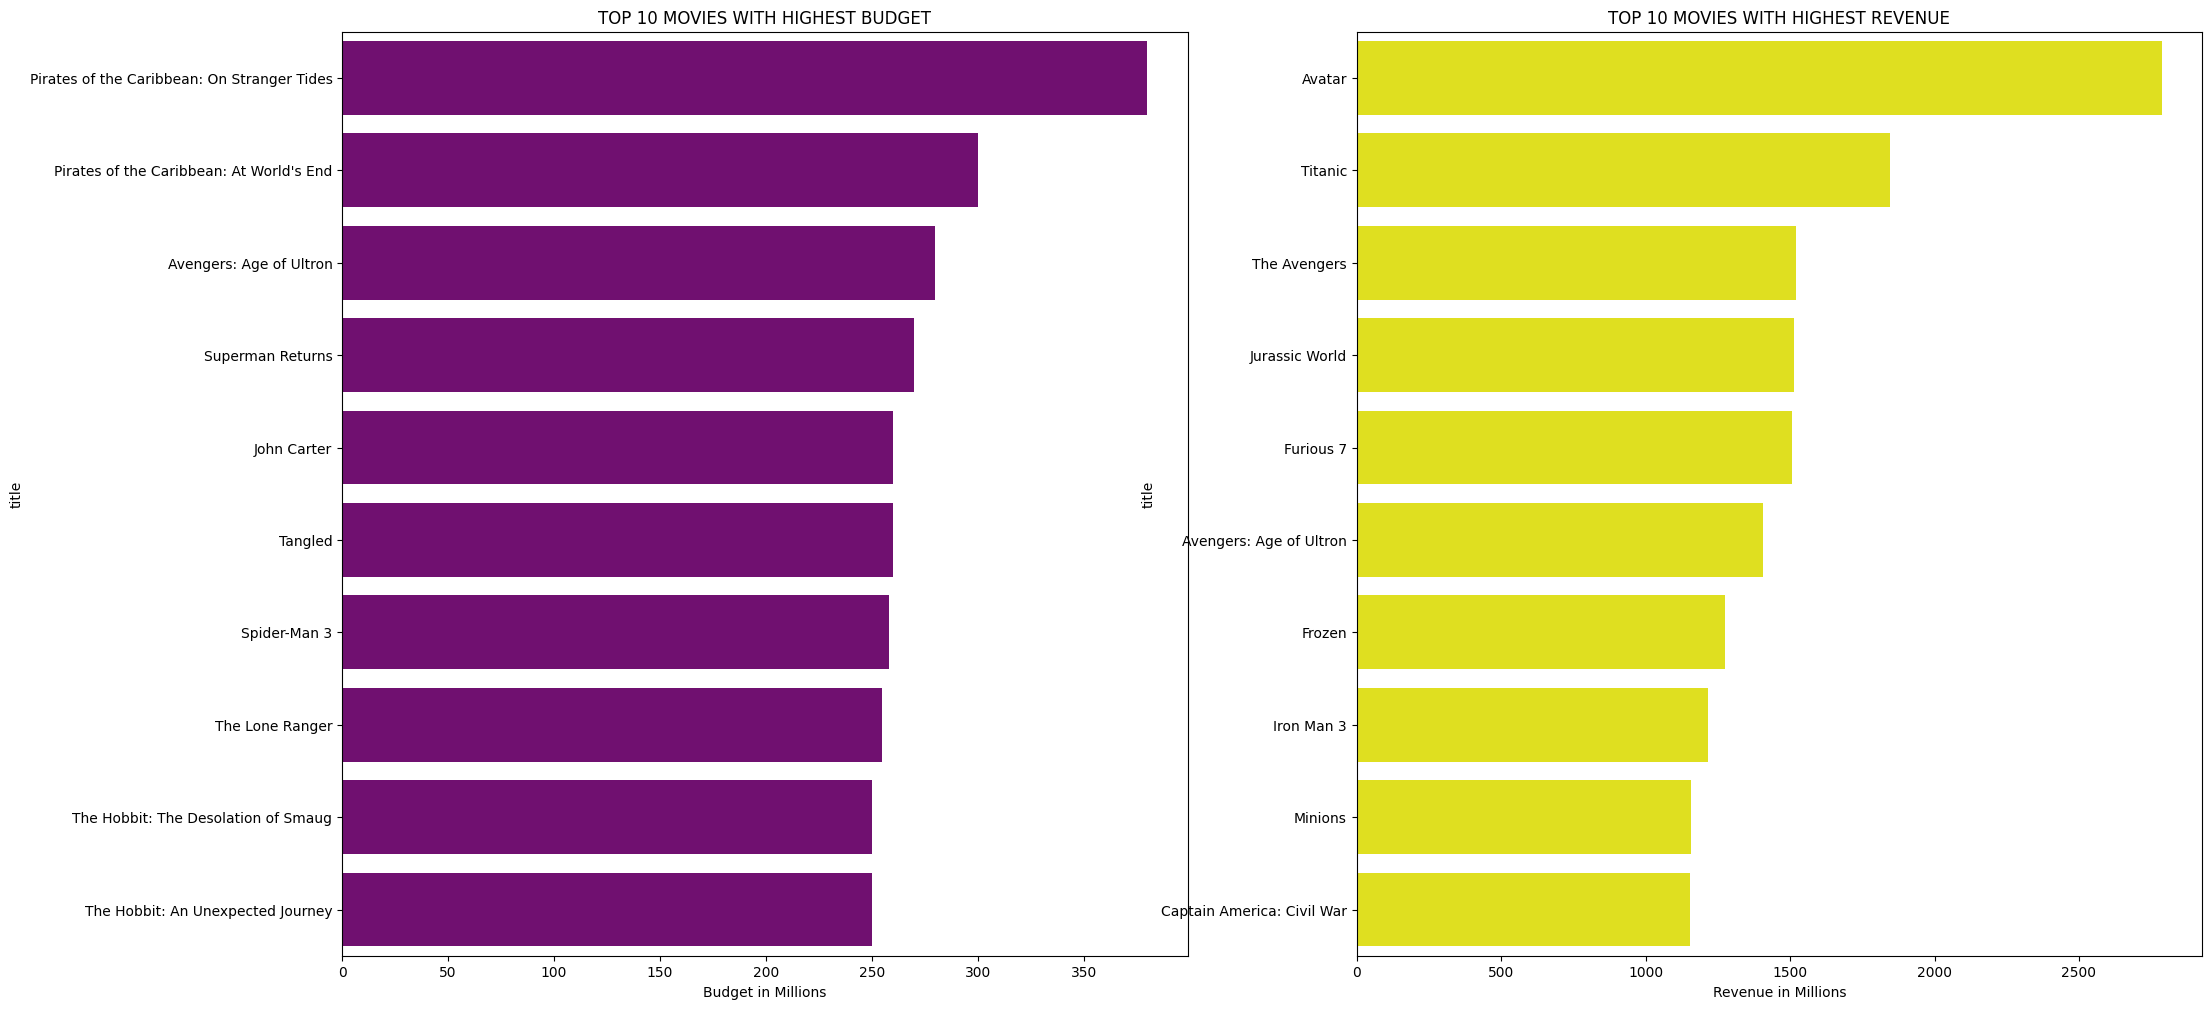

In [ ]:
# Top 10 movies with the highest budget and revenue
# We are to plot within the same figure, each with its own subplot

plt.figure(figsize=(24,12))
#First subplot
plt.subplot(1,2,1)
plt.title('TOP 10 MOVIES WITH HIGHEST BUDGET')
sns.barplot(y='title', x='budget', data=df[['title', 'budget']].sort_values('budget', ascending=False).head(10), color='purple')
plt.xlabel('Budget in Millions')

# Second subplot
plt.subplot(1,2,2)
plt.title('TOP 10 MOVIES WITH HIGHEST REVENUE')
sns.barplot(y='title', x='revenue', data=df[['title', 'revenue']].sort_values('revenue', ascending=False).head(10), color='yellow')
plt.xlabel('Revenue in Millions')
plt.show()

In [ ]:
df['original_language'].value_counts().head(10)

,count
original_language,
en,4510
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
ko,12


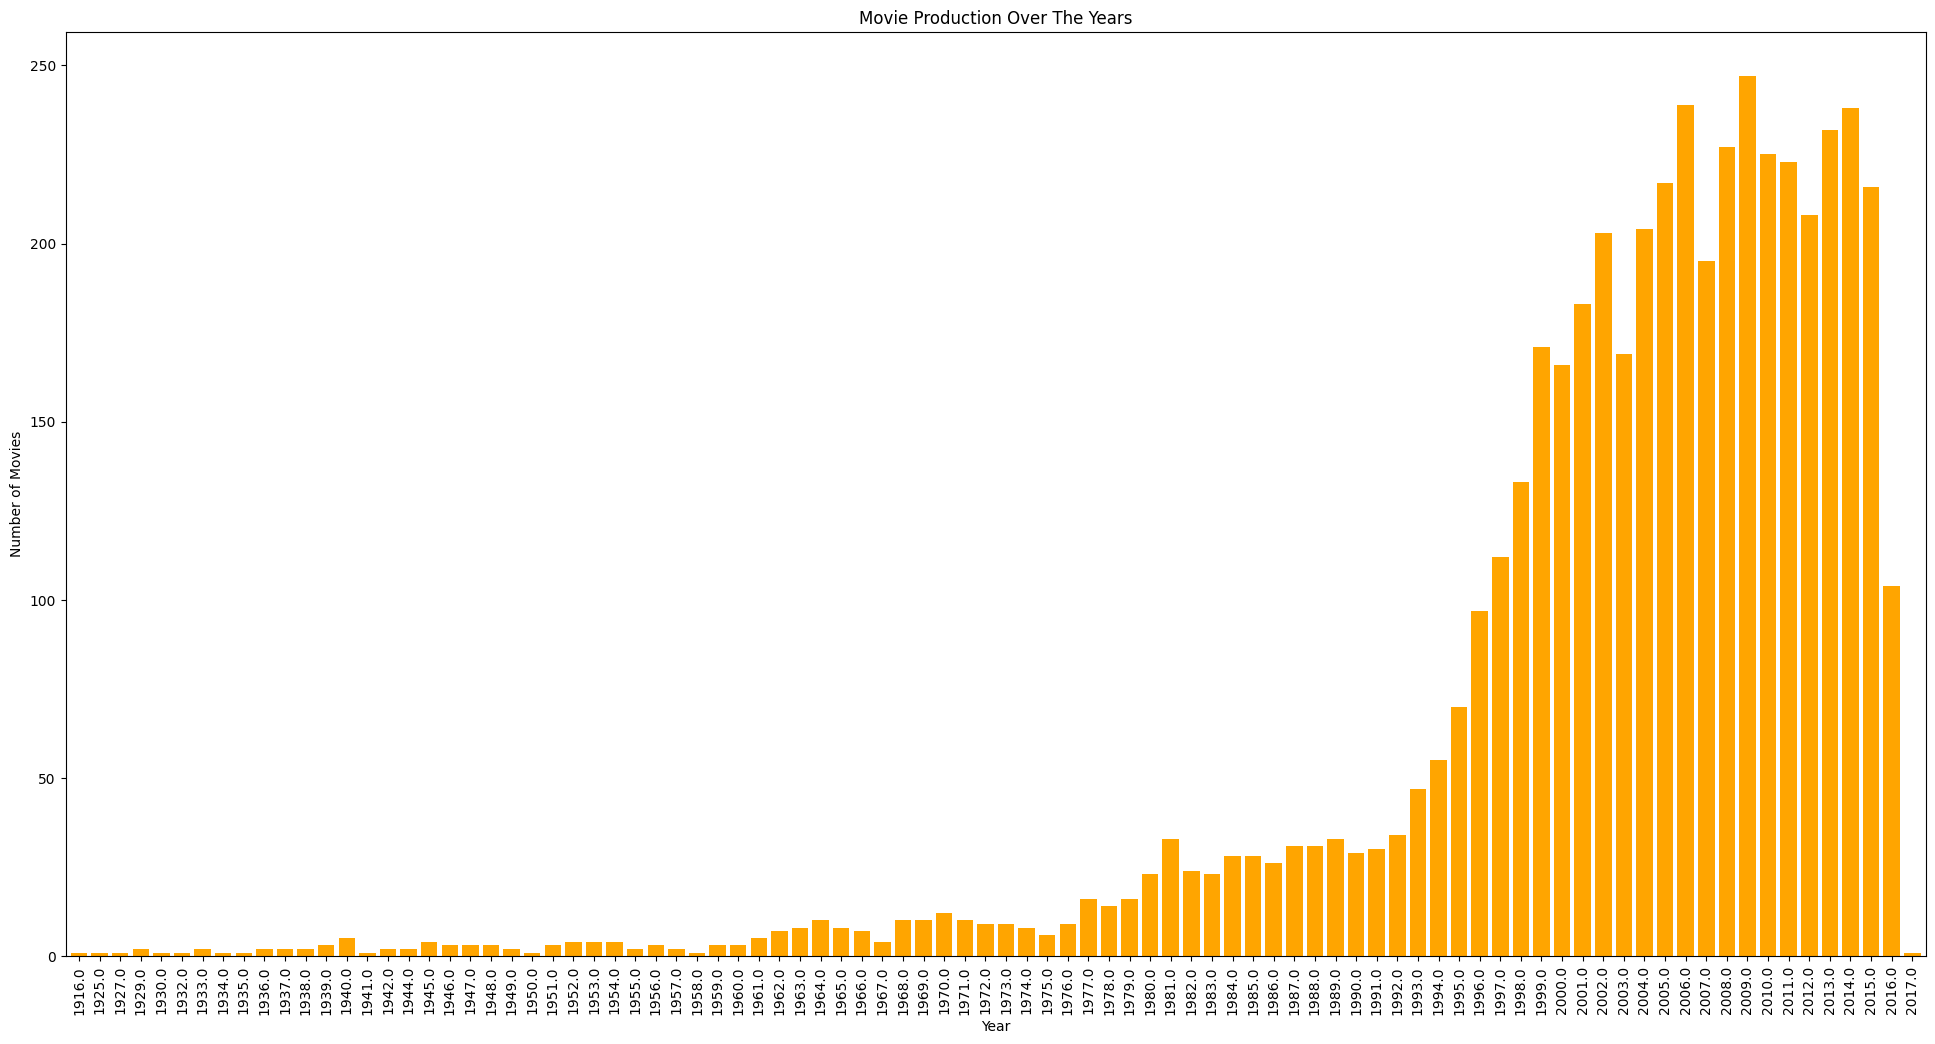

In [ ]:
df['release_year'] =df['release_date'].dt.year
#bar graph showing movie production over the years
plt.figure(figsize=(24,12))
df['release_year'].value_counts().sort_index().plot(kind='bar', color='orange', width=0.8)
plt.title('Movie Production Over The Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

In [ ]:
from collections import Counter

genre_counts = {}
for year in df['release_year'].unique():
    yearly_genres = [genre for genres in df[df['release_year'] == year]['genres'] for genre in genres]
    genre_counts[year] = Counter(yearly_genres)

genre_df = pd.DataFrame(genre_counts).T.fillna(0)

genre_df.head()

,Action,Adventure,Fantasy,Science Fiction,Family,Thriller,Animation,Drama,Comedy,Mystery,Romance,Music,History,Crime,Documentary,Horror,War,Foreign,Western,TV Movie
2009.0,51.0,36.0,22.0,32.0,28.0,59.0,15.0,122.0,97.0,28.0,57.0,11.0,8.0,32.0,5.0,30.0,4.0,4.0,0.0,0.0
2007.0,44.0,25.0,19.0,13.0,20.0,53.0,10.0,97.0,67.0,17.0,37.0,11.0,9.0,28.0,7.0,27.0,2.0,3.0,5.0,0.0
2015.0,46.0,35.0,10.0,28.0,17.0,67.0,13.0,95.0,52.0,20.0,23.0,8.0,9.0,26.0,7.0,33.0,2.0,0.0,7.0,0.0
2012.0,43.0,25.0,19.0,22.0,17.0,58.0,13.0,79.0,80.0,8.0,39.0,7.0,4.0,27.0,9.0,33.0,2.0,1.0,2.0,2.0
2010.0,49.0,30.0,21.0,19.0,29.0,56.0,13.0,115.0,87.0,17.0,45.0,2.0,8.0,30.0,7.0,27.0,6.0,1.0,5.0,0.0


In [ ]:
genre_df.sum().sort_values(ascending=False)

,0
Drama,2300.0
Comedy,1723.0
Thriller,1275.0
Action,1156.0
Romance,895.0
Adventure,792.0
Crime,697.0
Science Fiction,538.0
Horror,520.0
Family,514.0


We can plot this:

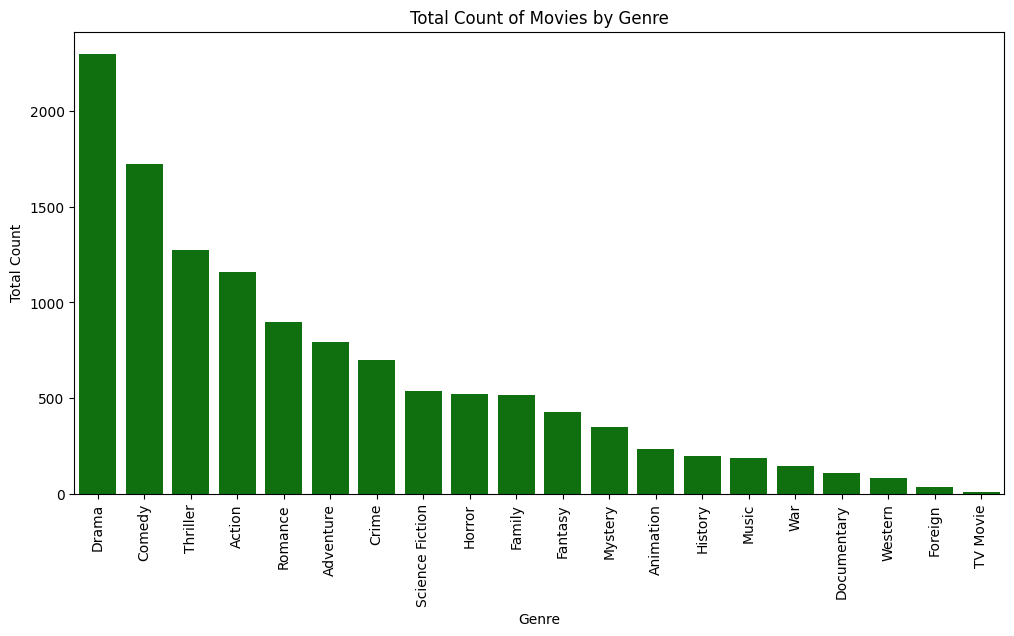

In [ ]:
# we can have the genres on the x axis which in this case are the index arranged in decreasing order
#total count values on the y axis similarly arranged in decreasing order.
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_df.sum().sort_values(ascending=False).index, y=genre_df.sum().sort_values(ascending=False).values, color='green')
plt.xlabel('Genre')
plt.ylabel('Total Count')
plt.title('Total Count of Movies by Genre')
plt.xticks(rotation=90)
plt.show()

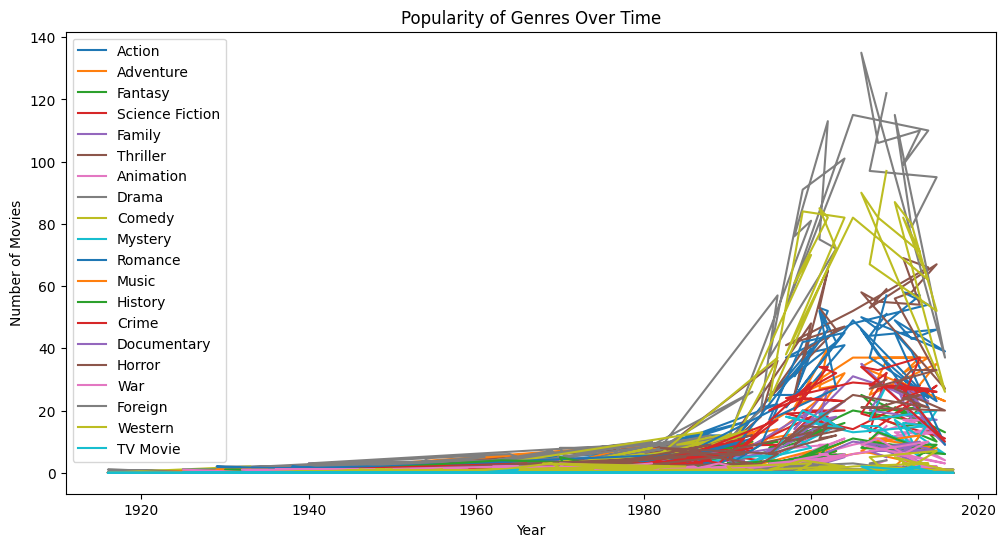

In [ ]:
plt.figure(figsize=(12, 6))
for genre in genre_df.columns:
  plt.plot(genre_df.index, genre_df[genre], label=genre)
  plt.xlabel('Year')
  plt.ylabel('Number of Movies')
  plt.title('Popularity of Genres Over Time')
  plt.legend()

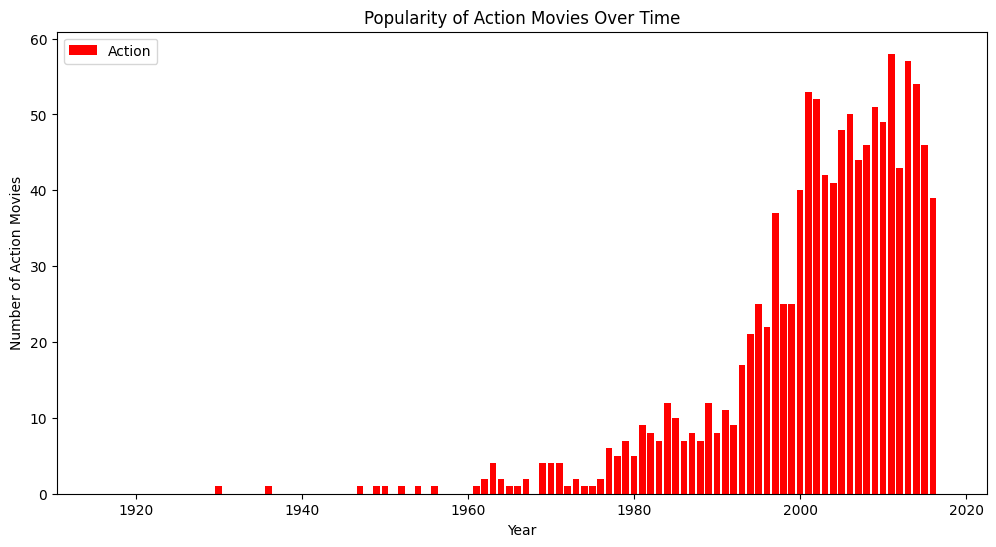

In [ ]:
# Filter the genre_df for the 'Action' genre
action_df = genre_df['Action']

# Plot the number of action movies over time
plt.figure(figsize=(12, 6))
plt.bar(action_df.index, action_df.values, label='Action', width=0.8, color='red')
plt.xlabel('Year')
plt.ylabel('Number of Action Movies')
plt.title('Popularity of Action Movies Over Time')
plt.legend()
plt.show()

In [ ]:
print(df.columns)

Index(['budget', 'genres', 'id', 'keywords', 'production_countries', 'status',
       'tagline', 'overview', 'original_language', 'popularity',
       'production_companies', 'release_date', 'revenue', 'runtime', 'title',
       'vote_average', 'movie_id', 'cast', 'crew', 'release_year'],
      dtype='object')


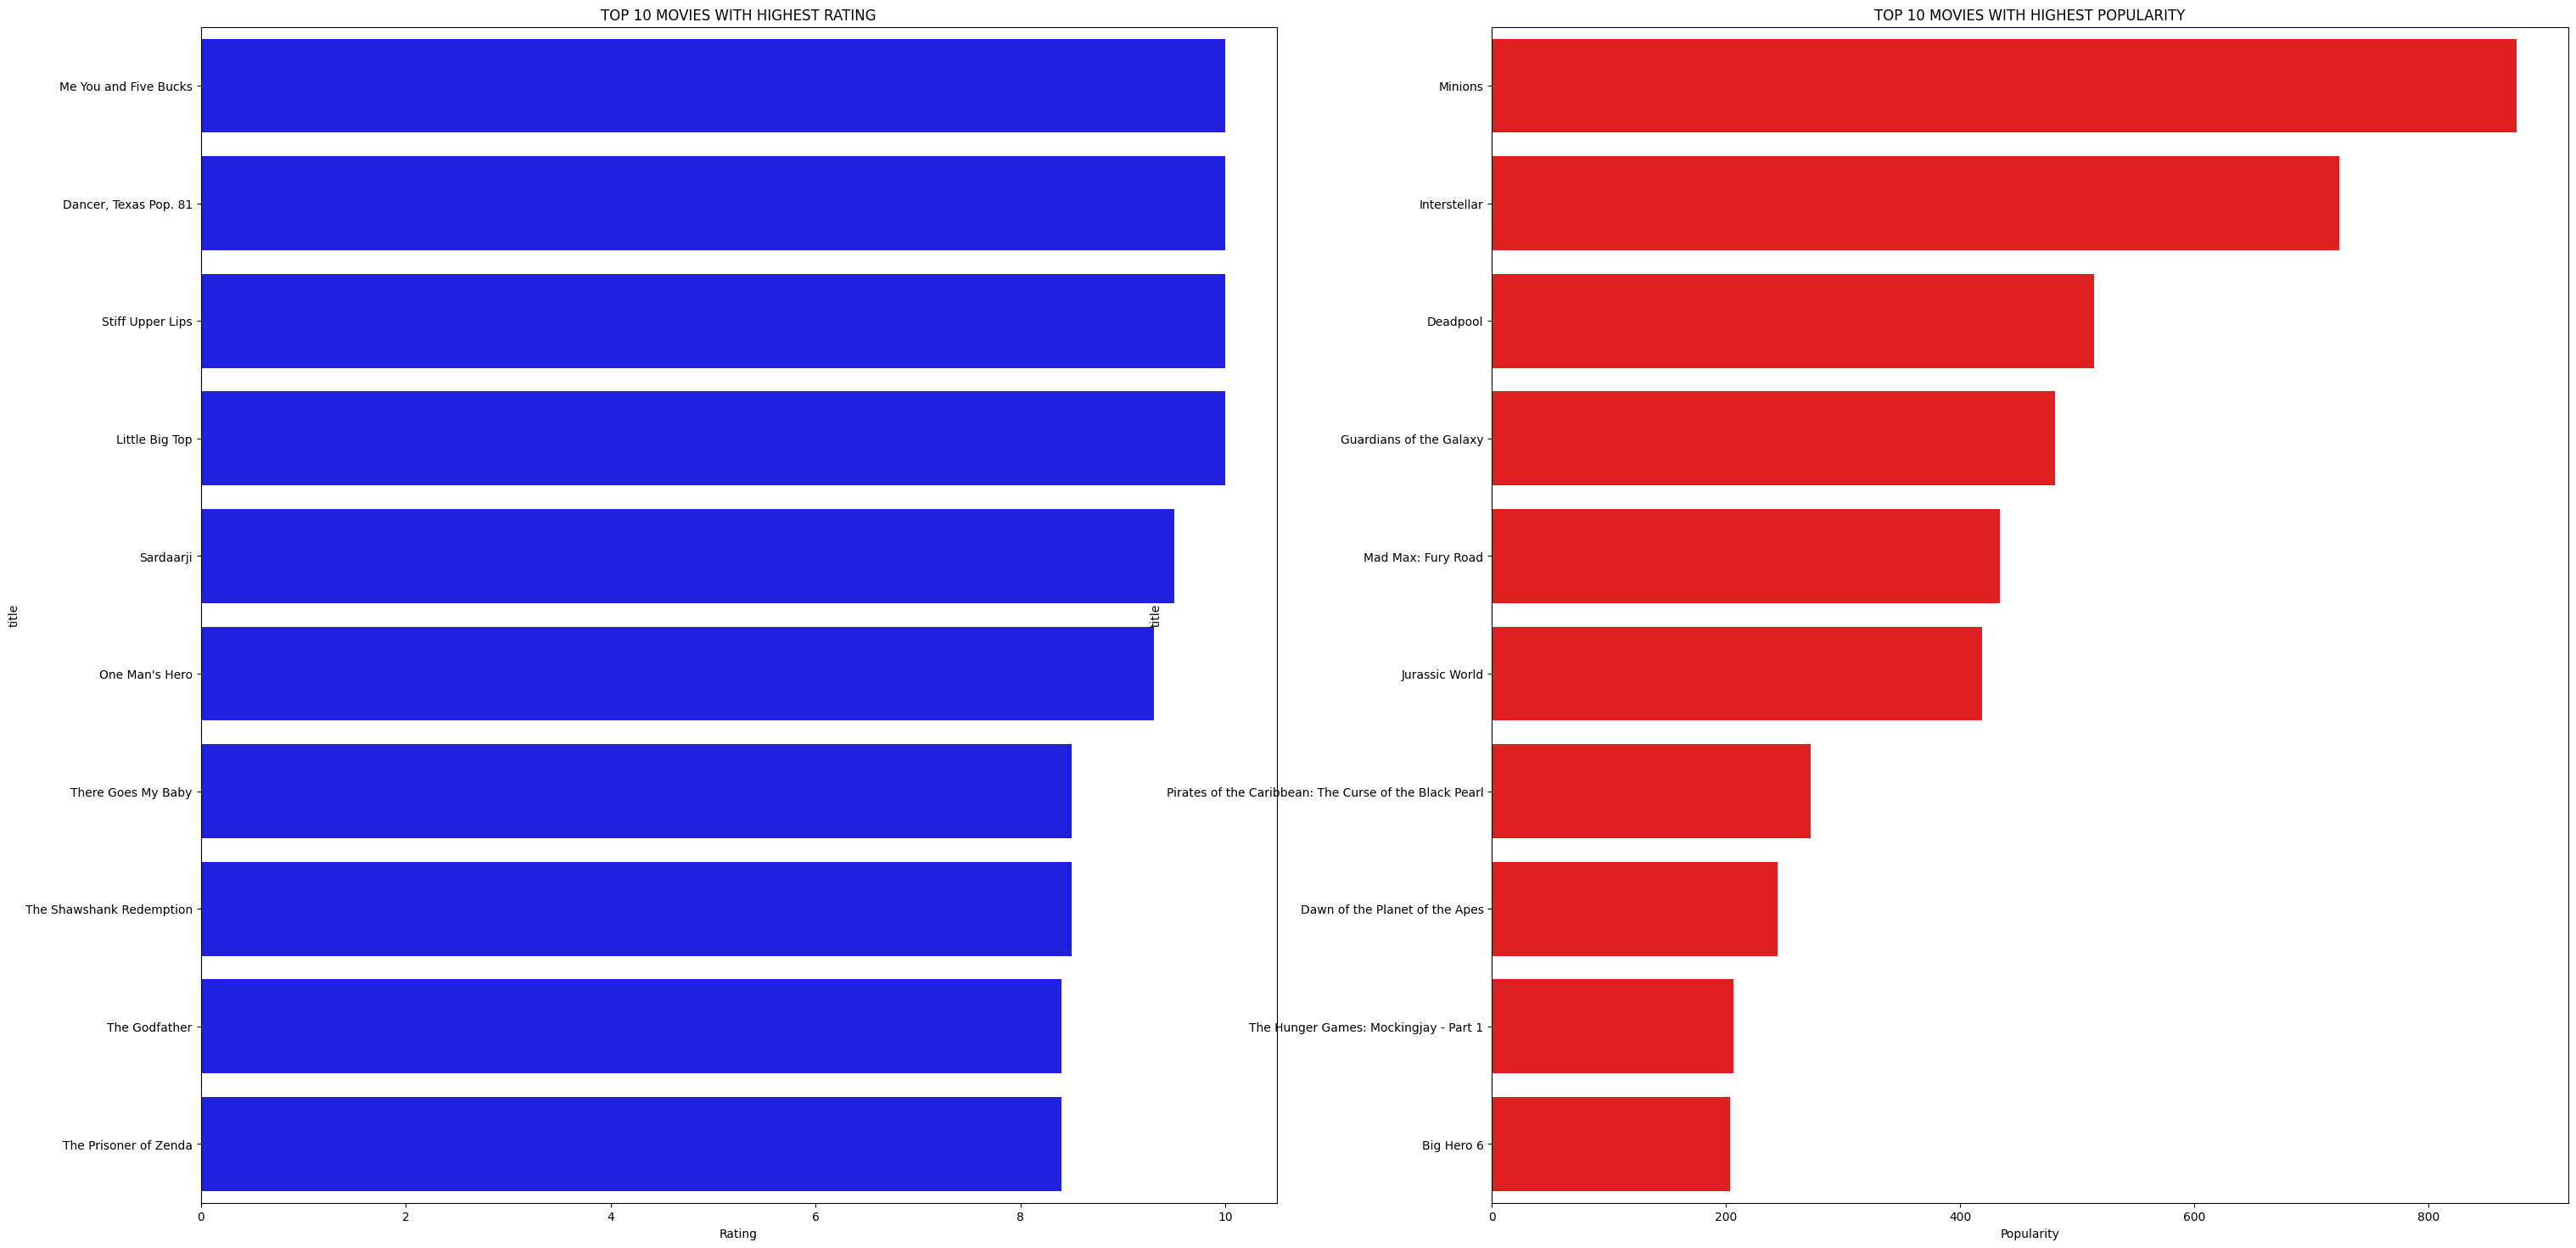

In [ ]:
plt.figure(figsize=(36,18))
#First subplot
plt.subplot(1,2,1)
plt.title('TOP 10 MOVIES WITH HIGHEST RATING')
sns.barplot(y='title', x='vote_average', data=df[['title', 'vote_average']].sort_values('vote_average', ascending=False).head(10), color='blue')
plt.xlabel('Rating')

# Second subplot
plt.subplot(1,2,2)
plt.title('TOP 10 MOVIES WITH HIGHEST POPULARITY')
sns.barplot(y='title', x='popularity', data=df[['title', 'popularity']].sort_values('popularity', ascending=False).head(10), color='red')
plt.xlabel('Popularity')
plt.show()

In [ ]:
# Select only numerical columns for correlation analysis
movie_num_df = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = movie_num_df.corr()

correlation_matrix

,budget,popularity,revenue,runtime,vote_average,vote_count,release_year
budget,1.000000,0.505388,0.730286,0.269848,0.092567,0.593096,0.170070
popularity,0.505388,1.000000,0.644582,0.225800,0.273964,0.778205,0.102230
revenue,0.730286,0.644582,1.000000,0.251206,0.197087,0.781395,0.090051
runtime,0.269848,0.225800,0.251206,1.000000,0.374159,0.272256,-0.166369
vote_average,0.092567,0.273964,0.197087,0.374159,1.000000,0.313002,-0.198487
vote_count,0.593096,0.778205,0.781395,0.272256,0.313002,1.000000,0.114323
release_year,0.170070,0.102230,0.090051,-0.166369,-0.198487,0.114323,1.000000


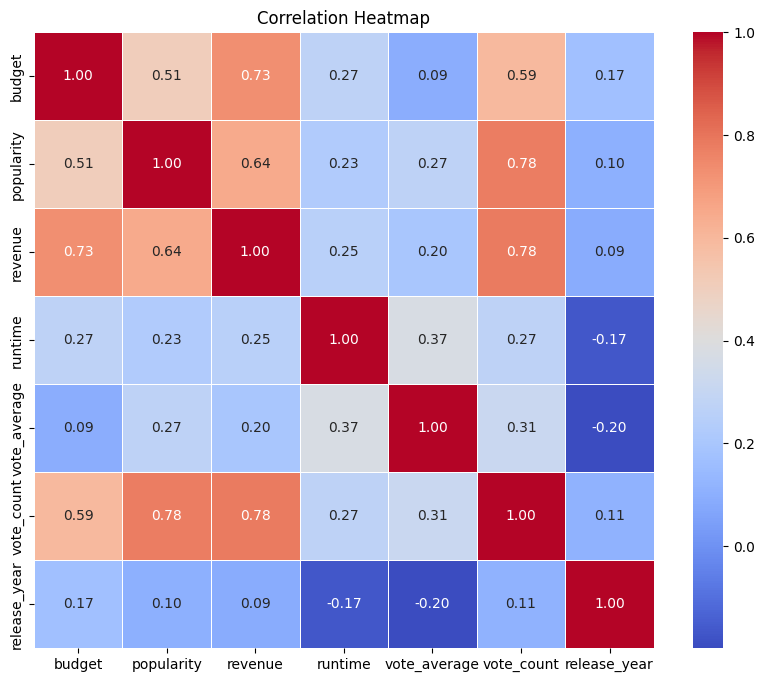

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   budget             4809 non-null   int64         
 1   genres             4809 non-null   object        
 2   original_language  4809 non-null   object        
 3   popularity         4809 non-null   float64       
 4   release_date       4808 non-null   datetime64[ns]
 5   revenue            4809 non-null   int64         
 6   runtime            4809 non-null   float64       
 7   title              4809 non-null   object        
 8   vote_average       4809 non-null   float64       
 9   vote_count         4809 non-null   int64         
 10  director           4809 non-null   object        
 11  release_year       4808 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 451.0+ KB


##Predictive Analysis

##Preparing the data

In [ ]:
df_model=df.copy()

In [ ]:
# Preparing the dataset for prediction
df_model = df.dropna(subset=['budget', 'revenue', 'popularity', 'vote_average'])  # Ensure no missing values in critical columns

# Feature selection for revenue prediction
X_revenue = df_model[['budget', 'popularity', 'release_year']]  # Features
y_revenue = df_model['revenue']  # Target variable

# Feature selection for IMDb rating prediction
X_rating = df_model[['budget', 'popularity', 'vote_count']]  # Features
y_rating = df_model['vote_average']  # Target variable

##Train-Test Split and Scaling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train-Test split for Revenue prediction
X_revenue_train, X_revenue_test, y_revenue_train, y_revenue_test = train_test_split(X_revenue, y_revenue, test_size=0.2, random_state=42)

# Train-Test split for IMDb Rating prediction
X_rating_train, X_rating_test, y_rating_train, y_rating_test = train_test_split(X_rating, y_rating, test_size=0.2, random_state=42)

# Feature scaling
scaler_revenue = StandardScaler()
X_revenue_train_scaled = scaler_revenue.fit_transform(X_revenue_train)
X_revenue_test_scaled = scaler_revenue.transform(X_revenue_test)

scaler_rating = StandardScaler()
X_rating_train_scaled = scaler_rating.fit_transform(X_rating_train)
X_rating_test_scaled = scaler_rating.transform(X_rating_test)

##Training the Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Revenue Prediction Model
revenue_model = RandomForestRegressor(n_estimators=100, random_state=42)
revenue_model.fit(X_revenue_train_scaled, y_revenue_train)

# IMDb Rating Prediction Model
rating_model = RandomForestRegressor(n_estimators=100, random_state=42)
rating_model.fit(X_rating_train_scaled, y_rating_train)

RandomForestRegressor(random_state=42)

##Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the Revenue Prediction Model
y_revenue_pred = revenue_model.predict(X_revenue_test_scaled)
revenue_rmse = mean_squared_error(y_revenue_test, y_revenue_pred, squared=False)
revenue_r2 = r2_score(y_revenue_test, y_revenue_pred)

print(f"Revenue Prediction - RMSE: {revenue_rmse:.2f}, R²: {revenue_r2:.2f}")

# Evaluate the IMDb Rating Prediction Model
y_rating_pred = rating_model.predict(X_rating_test_scaled)
rating_rmse = mean_squared_error(y_rating_test, y_rating_pred, squared=False)
rating_r2 = r2_score(y_rating_test, y_rating_pred)

print(f"TMDb Rating Prediction - RMSE: {rating_rmse:.2f}, R²: {rating_r2:.2f}")

Revenue Prediction - RMSE: 90.57, R²: 0.69
TMDb Rating Prediction - RMSE: 0.94, R²: 0.32


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


##Prediction Function

In [ ]:
def predict_revenue(title):
    movie = df_model[df_model['title'].str.lower() == title.lower()]
    if movie.empty:
        return f"Movie '{title}' not found in the dataset."

    # Extract the features for the movie
    input_features = movie[['budget', 'popularity', 'release_year']]
    input_scaled = scaler_revenue.transform(input_features)
    revenue_prediction = revenue_model.predict(input_scaled)
    return f"The predicted revenue for '{title}' is ${revenue_prediction[0]:,.2f} million."

###Predict TMDb Rating:

In [ ]:
def predict_rating(title):
    movie = df_model[df_model['title'].str.lower() == title.lower()]
    if movie.empty:
        return f"Movie '{title}' not found in the dataset."

    # Extract the features for the movie
    input_features = movie[['budget', 'popularity', 'vote_count']]
    input_scaled = scaler_rating.transform(input_features)
    rating_prediction = rating_model.predict(input_scaled)
    return f"The predicted TMDb rating for '{title}' is {rating_prediction[0]:.2f}."

###Save the Dataset with Predictions

In [ ]:
# Add predicted values to the dataset
df_model['Predicted Revenue'] = revenue_model.predict(scaler_revenue.transform(X_revenue))
df_model['Predicted TMDb Rating'] = rating_model.predict(scaler_rating.transform(X_rating))

# Save the processed dataset with predictions
df_model.to_csv('processed_movie_data_with_predictions.csv', index=False)
print("Processed dataset with predictions saved as 'processed_movie_data_with_predictions.csv'")

Processed dataset with predictions saved as 'processed_movie_data_with_predictions.csv'
